## Market segmentation

Consider the data in [social_marketing.csv](../data/social_marketing.csv).  This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label.  The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers.  They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014.  Every post was examined by a human annotator contracted through [Amazon's Mechanical Turk](https://www.mturk.com/mturk/welcome) service.  Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.)  Annotators were allowed to classify a post as belonging to more than one category.  For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports."  You get the picture.

Each row of [social_marketing.csv](../data/social_marketing.csv) represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code.  Each column represents an interest, which are labeled along the top of the data file.  The entries are the number of posts by a given user that fell into the given category.  Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual).  There are a lot of spam and pornography ["bots" on Twitter](http://mashable.com/2013/11/08/twitter-spambots/); while these have been filtered out of the data set to some extent, there will certainly be some that slip through.  There's also an "uncategorized" label.  Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories.  (A lot of annotators may used the "chatter" category for this as well.)  Keep in mind as you examine the data that you cannot expect perfect annotations of all posts.  Some annotators might have simply been asleep at the wheel some, or even all, of the time!  Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience.  You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests?  A cluster?  A latent factor?  Etc.)  Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


social_data = pd.read_csv("data/social_marketing.csv")

In [2]:
social_data.head(4)
print(social_data.describe())

           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.

### Data preprocessing:


Remove unused columns like chatter, spam, adult, uncategorized

In [3]:
    social_data = social_data.drop(['spam','adult','chatter','uncategorized','photo_sharing'],axis=1)
    social_data.loc[0]

Unnamed: 0          hmjoe4g3k
current_events              0
travel                      2
tv_film                     1
sports_fandom               1
politics                    0
food                        4
family                      1
home_and_garden             2
music                       0
news                        0
online_gaming               0
shopping                    1
health_nutrition           17
college_uni                 0
sports_playing              2
cooking                     5
eco                         1
computers                   1
business                    0
outdoors                    2
crafts                      1
automotive                  0
art                         0
religion                    1
beauty                      0
parenting                   1
dating                      1
school                      0
personal_fitness           11
fashion                     0
small_business              0
Name: 0, dtype: object

### Correlation matrix:

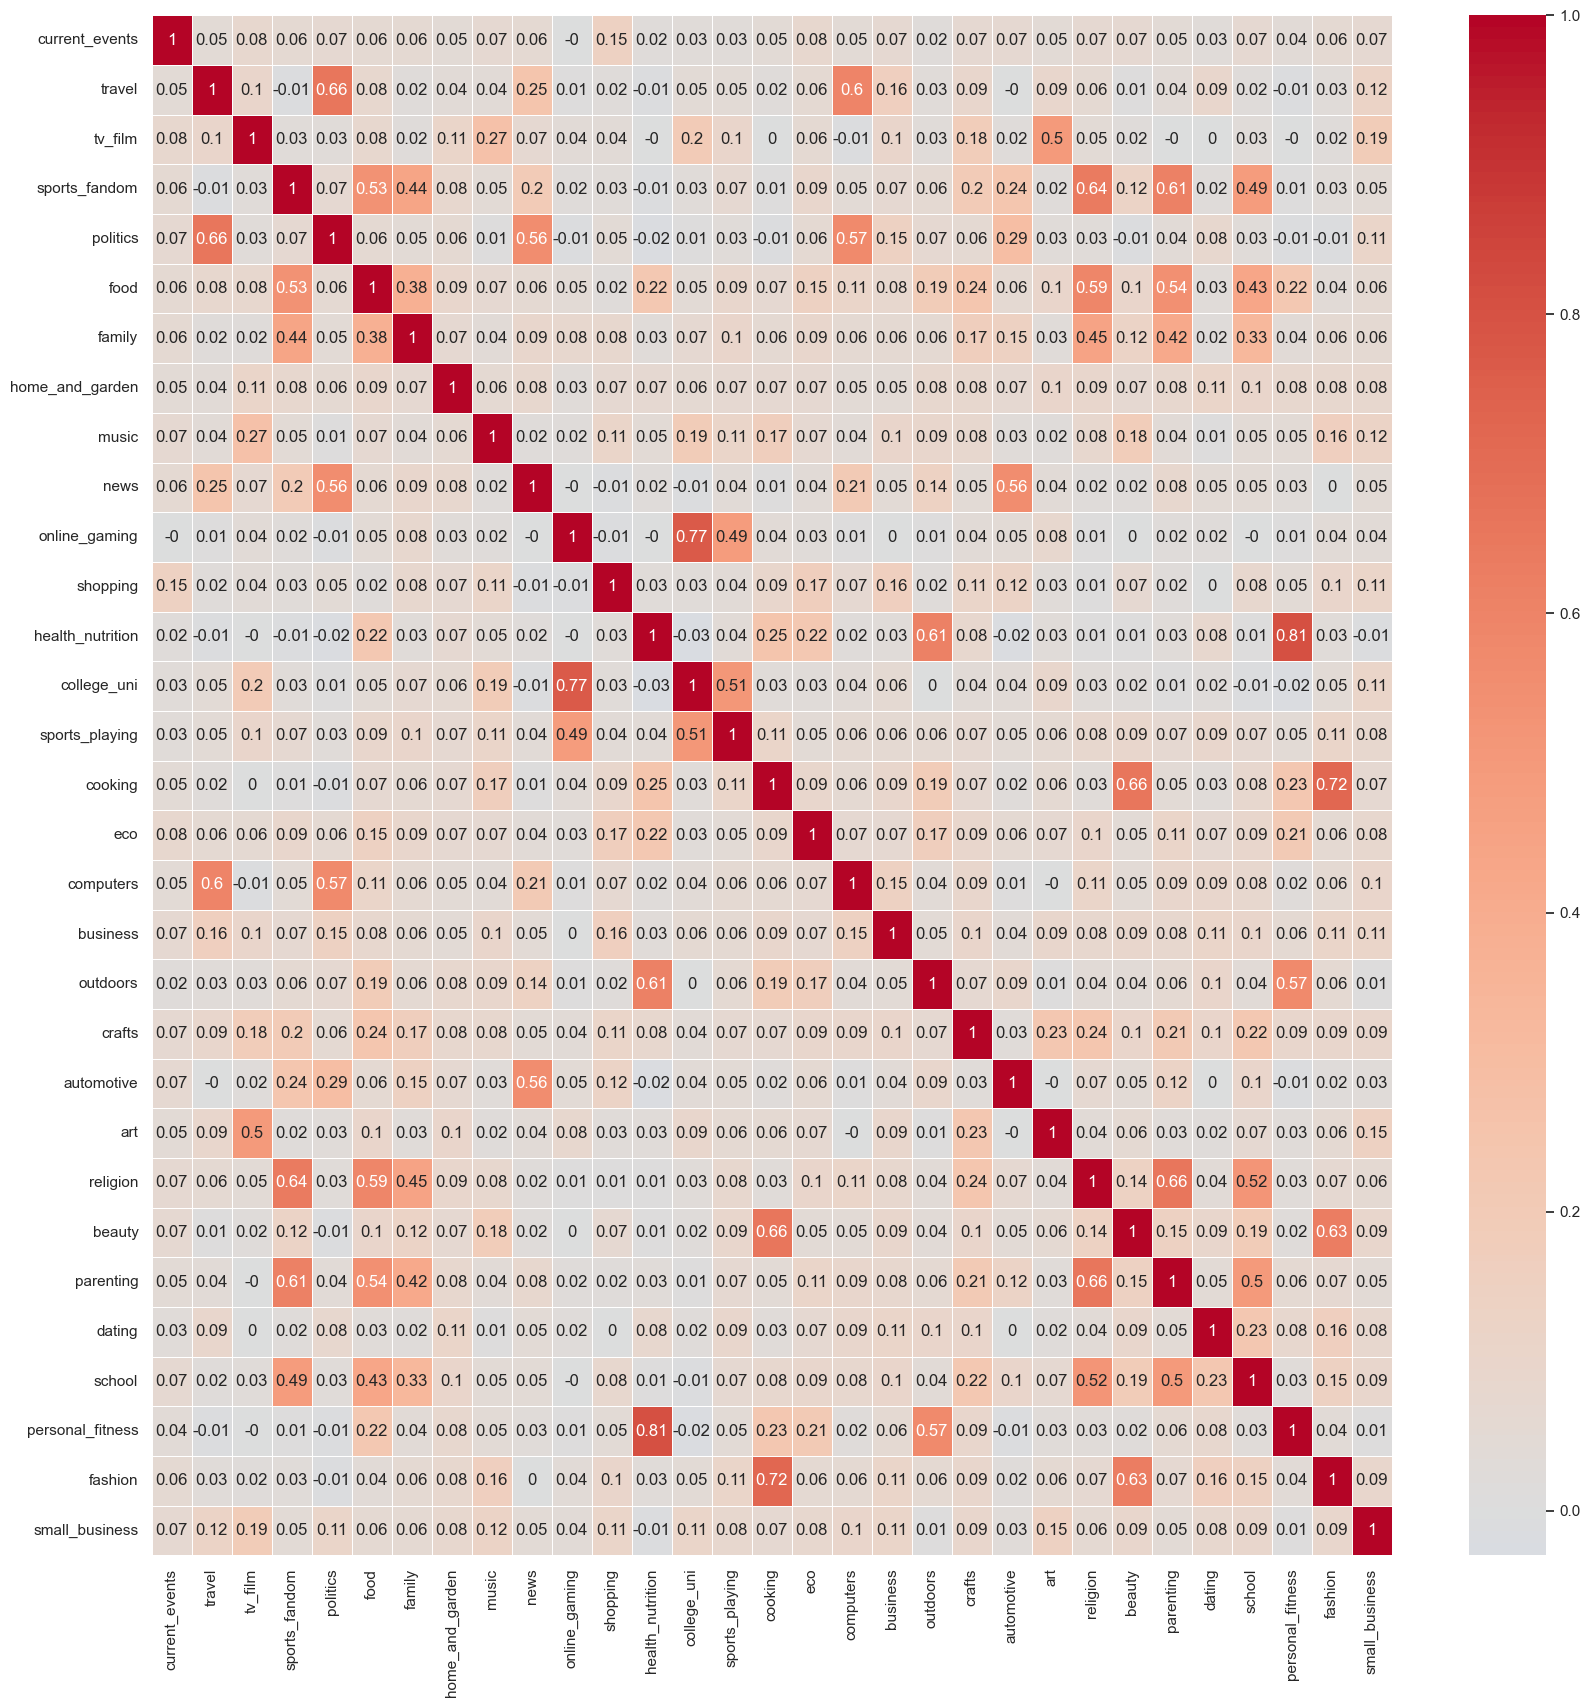

In [4]:

cormat = np.round(social_data.iloc[:, 1:].corr(), 2)
sns.set(style="white")
plt.figure(figsize=(20, 20))
sns.heatmap(cormat, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.show()

There are many correlations among the predictors. Few of the correlations are personal fitness and health nutrition, online beauty and fashion etc., 

Hence, let's use PCA to reduce the dimensions to create fewer number of uncorrelated variables:


### Principal Component Analysis

PCA Summary:
Explained Variance Ratios:
 [0.13951638 0.08527799 0.08161422 0.07460999 0.06699555 0.05316382
 0.04620917 0.03885203 0.03568385 0.03134996 0.03009224 0.02938343
 0.02832118 0.02737357 0.02618203 0.02252467 0.02105482 0.01833032
 0.01560197 0.0152254  0.01378487 0.01351651 0.01317303 0.01230743
 0.01158604 0.01142699 0.00987219 0.0076228  0.00737852 0.00620843
 0.00576059]


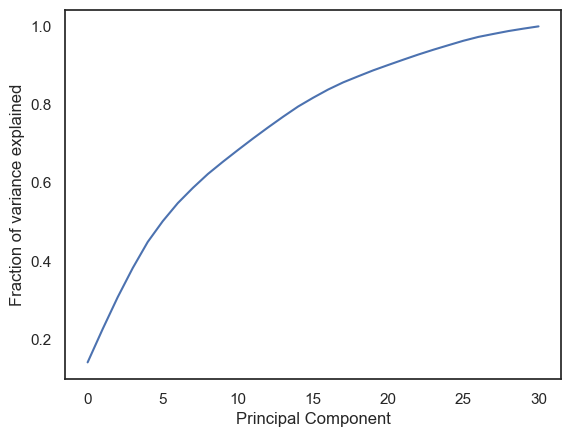

Cumulative variance explained for 18 components: 0.8565352279922055


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca_df = social_data.iloc[:, 1:]

# Standardize the data
scaler = StandardScaler()
pca_df_scaled = scaler.fit_transform(pca_df)

# Perform PCA
pca = PCA()
pca.fit(pca_df_scaled)

# Summary of PCA
print("PCA Summary:")
print("Explained Variance Ratios:\n", pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Component")
plt.ylabel("Fraction of variance explained")
plt.show()


print("Cumulative variance explained for 18 components:", np.cumsum(pca.explained_variance_ratio_)[17])






In [6]:
pca_loadings = pca.components_
scores = pca.transform(pca_df_scaled)

# # Select the first 18 principal components' scores
pc_data = pd.DataFrame(scores[:, :18])
X = pc_data

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7882 non-null   float64
 1   1       7882 non-null   float64
 2   2       7882 non-null   float64
 3   3       7882 non-null   float64
 4   4       7882 non-null   float64
 5   5       7882 non-null   float64
 6   6       7882 non-null   float64
 7   7       7882 non-null   float64
 8   8       7882 non-null   float64
 9   9       7882 non-null   float64
 10  10      7882 non-null   float64
 11  11      7882 non-null   float64
 12  12      7882 non-null   float64
 13  13      7882 non-null   float64
 14  14      7882 non-null   float64
 15  15      7882 non-null   float64
 16  16      7882 non-null   float64
 17  17      7882 non-null   float64
dtypes: float64(18)
memory usage: 1.1 MB


### K-Means clustering with pca:

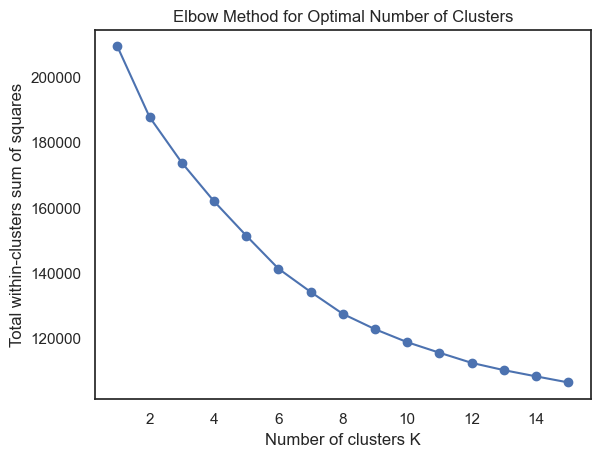

In [8]:
from sklearn.cluster import KMeans

# Compute and plot wss for k = 1 to k = 15.
k_max = 15
wss = []

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=15, random_state=123)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

plt.plot(range(1, k_max + 1), wss, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Total within-clusters sum of squares')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Since the sum of squares is decreasing continuosly with the increase in K. We cannot find the k with minimum sum of squares. Hence, let's decide to take k as 6 since after 6 clusters, there is not much decrease in the sum of squares.


### K-Means clustering with k=6:

In [9]:
kmeans = KMeans(n_clusters=6, n_init=15, random_state=123)
clust1 = kmeans.fit(X)

# Append cluster labels to the original data
social_clust1 = pd.concat([social_data, pd.Series(clust1.labels_, name='Cluster')], axis=1)



In [10]:
social_clust1['Cluster'].value_counts()

2    4515
3     888
1     759
5     695
4     571
0     454
Name: Cluster, dtype: int64

### Sample cluster visualisation:

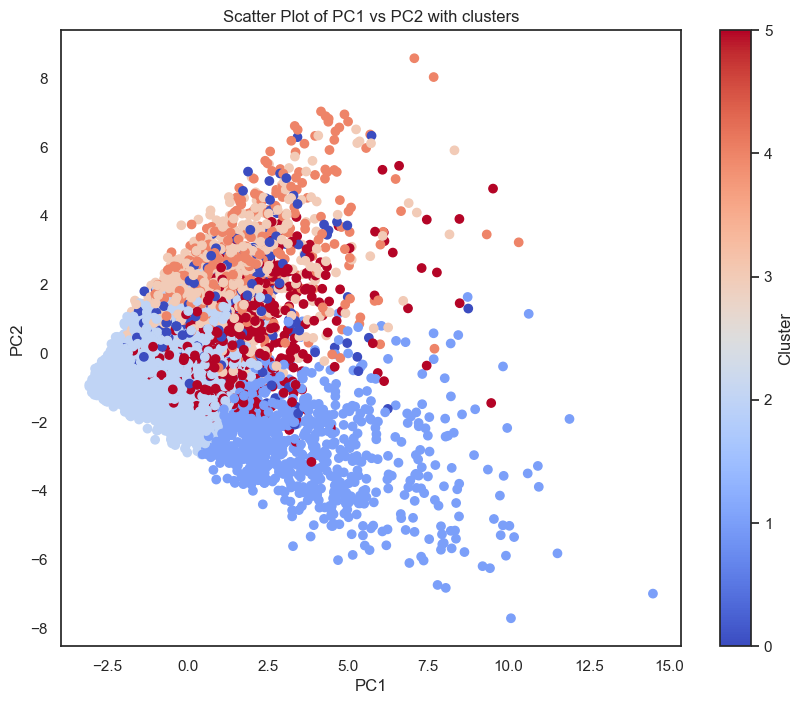

In [11]:
selected_columns = social_data.columns[2:]
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[0], X[1], c=social_clust1['Cluster'], cmap='coolwarm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f'Scatter Plot of PC1 vs PC2 with clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()

We have segregated all the data into clusters and now let's see the characteristics of each cluster as follows.


### Clusters characteristics:

In [12]:
mu = scaler.mean_
sigma = scaler.scale_



In [13]:
clust1.cluster_centers_
original_features = np.dot(clust1.cluster_centers_, pca_loadings[:18])

# Create a DataFrame for the original features
original_features_df = pd.DataFrame(original_features)

original_features_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.003268,-0.015271,0.484607,-0.115250,-0.179332,-0.026822,0.176390,0.136475,0.466374,-0.195331,...,0.061310,0.307429,-0.143946,-0.212327,-0.163186,0.015621,-0.221448,-0.165073,-0.068817,0.262155
1,0.111608,-0.118378,-0.007471,1.997325,-0.181224,1.806767,1.453346,0.172257,0.052957,-0.071343,...,0.150134,0.067892,2.138294,0.309939,2.040221,0.015582,1.711952,-0.104048,0.010909,0.106165
2,-0.060001,-0.214466,-0.045406,-0.289995,-0.248320,-0.354397,-0.257031,-0.113192,-0.126134,-0.238478,...,-0.186466,-0.068478,-0.290787,-0.275013,-0.300151,-0.092169,-0.248284,-0.326437,-0.267396,-0.097066
3,0.013798,-0.157111,-0.051507,-0.201590,-0.160335,0.433439,-0.070732,0.178453,0.044613,-0.037152,...,-0.152351,0.013922,-0.160963,-0.200267,-0.107831,0.206697,-0.150068,2.011123,-0.112298,-0.069597
4,0.164985,-0.065826,-0.048042,-0.193445,-0.160459,-0.243569,0.012769,0.125971,0.537840,-0.083055,...,0.024359,0.154143,-0.120132,2.445108,-0.071372,0.123436,0.153034,-0.036571,2.531986,0.212800
5,0.112589,1.787332,0.091851,0.194460,2.264934,-0.007010,0.047258,0.126563,-0.041950,1.870463,...,1.181995,0.025461,-0.047743,-0.166163,0.024816,0.206034,-0.045976,-0.197435,-0.166601,0.257481


In [14]:
social_clust1_main = original_features_df.T
social_clust1_main.rename(columns={0:'Cluster_1',1: 'Cluster_2',2: 'Cluster_3',3: 'Cluster_4',4: 'Cluster_5',5:'Cluster_6'},inplace=True)
social_clust1_main

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,0.003268,0.111608,-0.060001,0.013798,0.164985,0.112589
1,-0.015271,-0.118378,-0.214466,-0.157111,-0.065826,1.787332
2,0.484607,-0.007471,-0.045406,-0.051507,-0.048042,0.091851
3,-0.115250,1.997325,-0.289995,-0.201590,-0.193445,0.194460
4,-0.179332,-0.181224,-0.248320,-0.160335,-0.160459,2.264934
5,-0.026822,1.806767,-0.354397,0.433439,-0.243569,-0.007010
6,0.176390,1.453346,-0.257031,-0.070732,0.012769,0.047258
7,0.136475,0.172257,-0.113192,0.178453,0.125971,0.126563
8,0.466374,0.052957,-0.126134,0.044613,0.537840,-0.041950
9,-0.195331,-0.071343,-0.238478,-0.037152,-0.083055,1.870463


In [15]:
social_clust1_main['type'] = social_data.iloc[:, 1:].columns
social_clust1_main

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,type
0,0.003268,0.111608,-0.060001,0.013798,0.164985,0.112589,current_events
1,-0.015271,-0.118378,-0.214466,-0.157111,-0.065826,1.787332,travel
2,0.484607,-0.007471,-0.045406,-0.051507,-0.048042,0.091851,tv_film
3,-0.115250,1.997325,-0.289995,-0.201590,-0.193445,0.194460,sports_fandom
4,-0.179332,-0.181224,-0.248320,-0.160335,-0.160459,2.264934,politics
5,-0.026822,1.806767,-0.354397,0.433439,-0.243569,-0.007010,food
6,0.176390,1.453346,-0.257031,-0.070732,0.012769,0.047258,family
7,0.136475,0.172257,-0.113192,0.178453,0.125971,0.126563,home_and_garden
8,0.466374,0.052957,-0.126134,0.044613,0.537840,-0.041950,music
9,-0.195331,-0.071343,-0.238478,-0.037152,-0.083055,1.870463,news


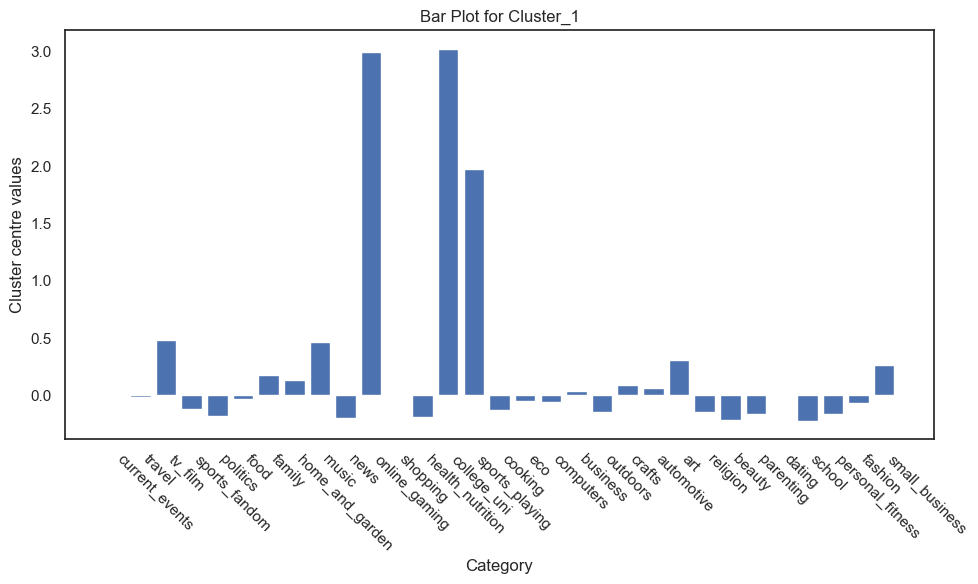

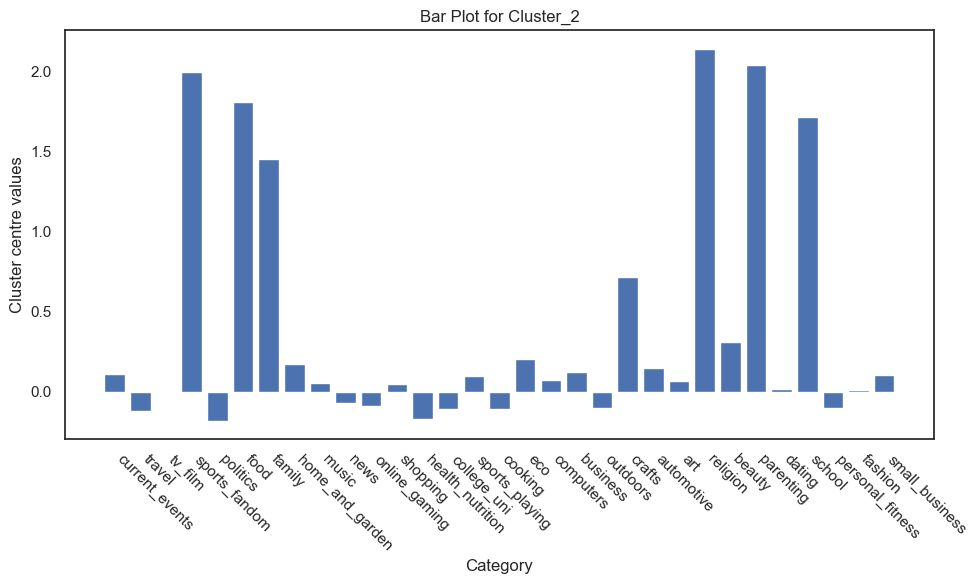

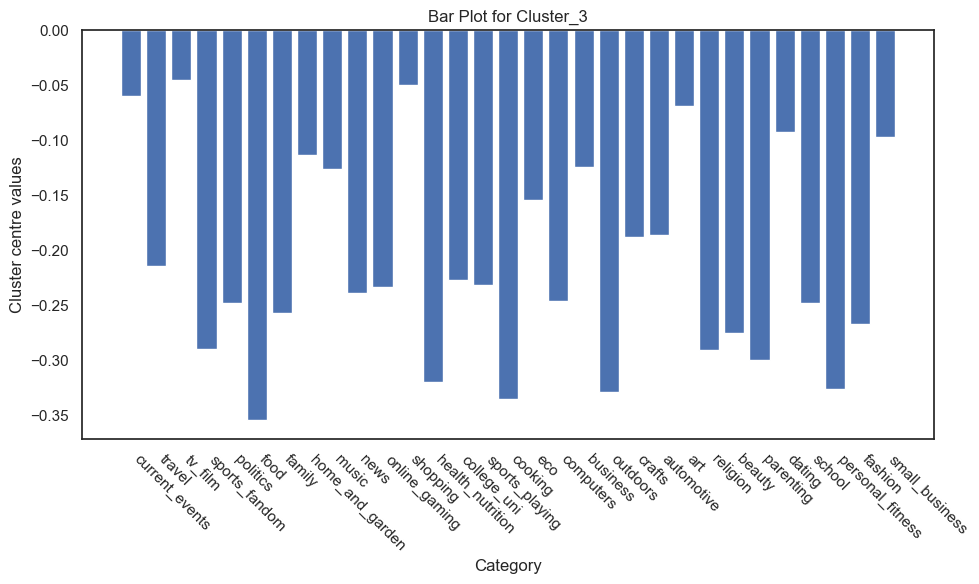

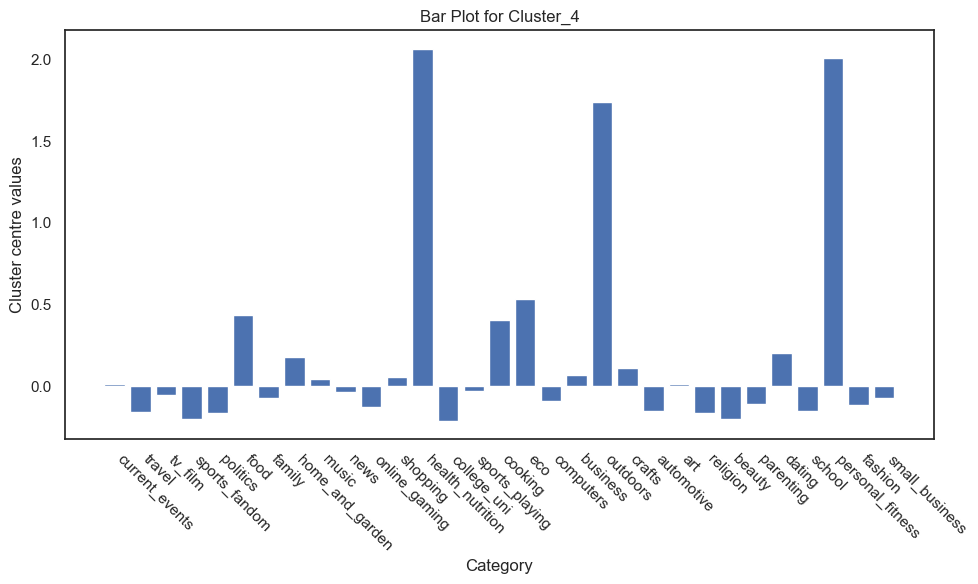

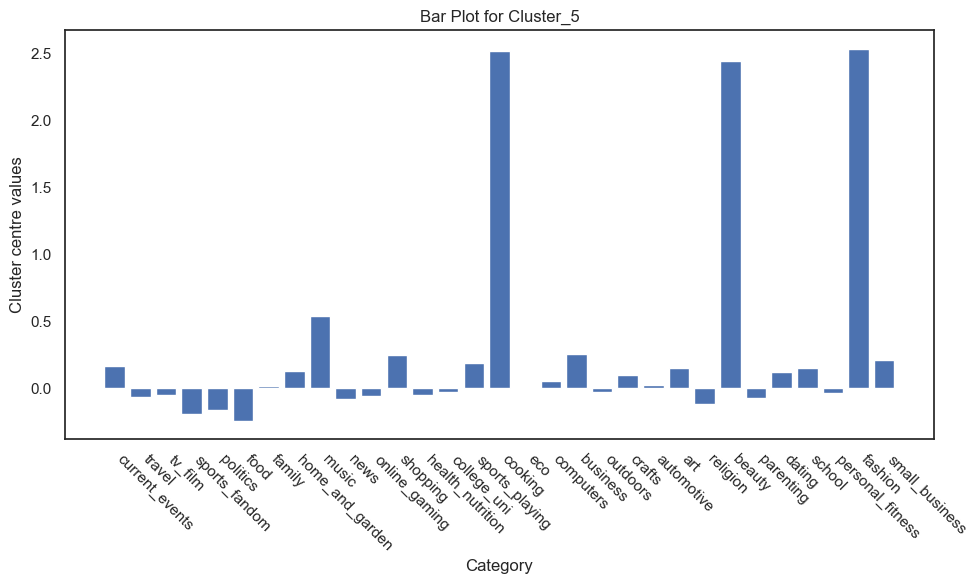

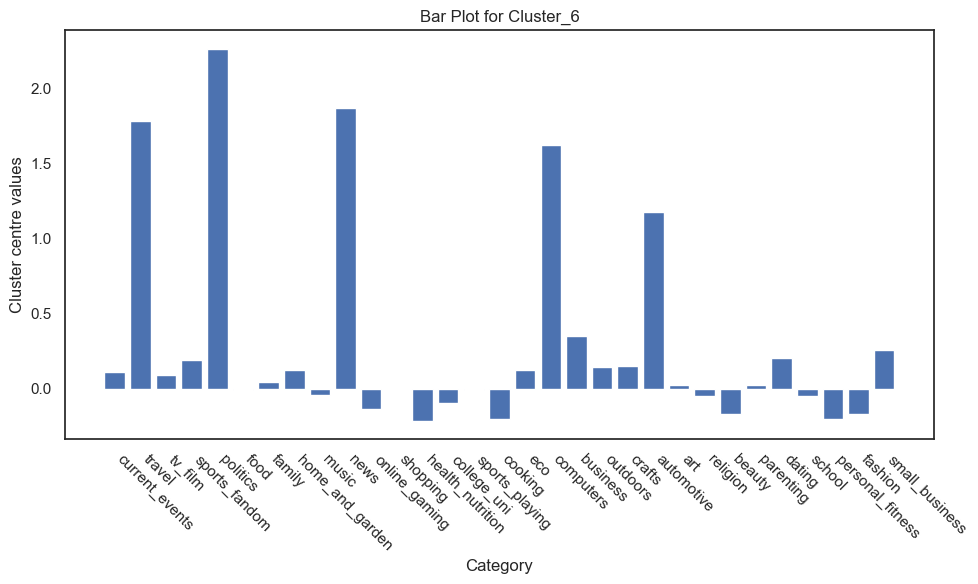

In [16]:
clusters_to_plot = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5','Cluster_6']

# Loop through each cluster and create the bar plot
for cluster_to_plot in clusters_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(social_clust1_main['type'], social_clust1_main[cluster_to_plot])
    plt.title(f'Bar Plot for {cluster_to_plot}')
    plt.xlabel('Category')
    plt.ylabel('Cluster centre values')
    plt.xticks(rotation=-45, ha='left')  # To show x-axis labels
    plt.tight_layout()
    plt.show()

### Insights and report:

**Below are the different market clusters identified:**

__Cluster1__ : Online_gaming, college_uni, sports_playing 

__Cluster2__ : religion, parenting, sports_fandom

__Cluster3__ : food, cooking, outdoors, health_nutrition, personal_fitness

__Cluster4__ : outdoors, health_nutrition, personal_fitness

__Cluster5__ : beauty, fashion, cooking

__Cluster6__ : politics, news, travel


Using KMeans, we have identified 6 market segments. NutrientH20 can leverage these segments to target the audience. For instance, NutrientH20 can market the audience in cluster one which consists of people who are student and have interests in playing/ gaming. These are mostly young people since they are university students.

Cluster 2 consists of older generation people who discuss about parenting and religion. Cluster 3 consists of people who are fitness conscious and love food. Cluster 4 consists of people who are outgoing and are health consious. Cluster 5 are more focused on personal grooming and fashion. Cluster 6 seems like people with eclectic interests - starting from travel to politics and news as well!

NutrientH20 can focus their marketing strategies based on the above clusters and design the advertisements separately for different clusters.

